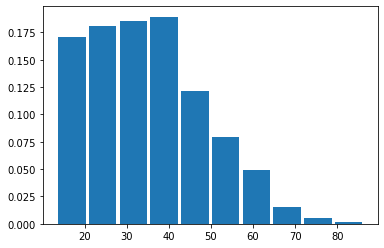

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ages_adult = np.loadtxt("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", usecols=0, delimiter=", ")
hist, bins = np.histogram(ages_adult)
hist = hist / hist.sum()
plt.bar(bins[:-1], hist, width=(bins[1]-bins[0]) * 0.9)
plt.show()

In [2]:
!pip install diffprivlib

In [3]:
from diffprivlib.mechanisms import Laplace

def histogram_laplace(sample, epsilon=1, bins=10, range=None, normed=None, weights=None, density=None):

  hist, bin_edges = np.histogram(sample, bins=bins, range=range, normed=None, weights=weights, density=None)
  dp_mech = Laplace().set_epsilon(epsilon).set_sensitivity(1)
  dp_hist = np.zeros_like(hist)

  for i in np.arange(dp_hist.shape[0]):
    dp_hist[i] = dp_mech.randomise(int(hist[i]))

  if normed or density:
    bin_sizes = np.array(np.diff(bin_edges), float)
    return dp_hist / bin_sizes / dp_hist.sum(), bin_edges

  return dp_hist, bin_edges


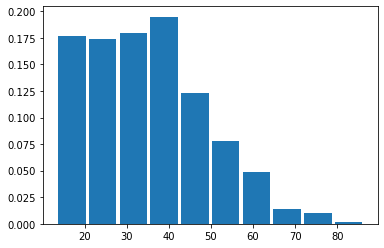

In [4]:
dp_hist, dp_bins = histogram_laplace(ages_adult, epsilon=0.01)
dp_hist = dp_hist / dp_hist.sum()

plt.bar(dp_bins[:-1], dp_hist, width=(dp_bins[1] - dp_bins[0]) * 0.9)
plt.show()